In [2]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Barra de progreso de un proceso
# ------------------------------------------------------------------------------
from tqdm import tqdm

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

In [3]:
df = pd.read_pickle("datos/2.cas_encoding.pkl")
df.head()

,seasons,atemp,hum,windspeed,casual,yryr_0,yryr_1,mnthmnth_1,mnthmnth_2,mnthmnth_3,...,weekday_numweekday_num_2,weekday_numweekday_num_3,weekday_numweekday_num_4,weekday_numweekday_num_5,weekday_numweekday_num_6,workingday_numworkingday_num_0,workingday_numworkingday_num_1,weathersitweathersit_1,weathersitweathersit_2,weathersitweathersit_3
0,1,18.18125,80.5833,10.749882,331,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,17.68695,69.6087,16.652113,131,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1,9.47025,43.7273,16.636703,120,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1,10.60610,59.0435,10.739832,108,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1,11.46350,43.6957,12.522300,82,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [4]:
df.columns

Index(['seasons', 'atemp', 'hum', 'windspeed', 'casual', 'yryr_0', 'yryr_1',
       'mnthmnth_1', 'mnthmnth_2', 'mnthmnth_3', 'mnthmnth_4', 'mnthmnth_5',
       'mnthmnth_6', 'mnthmnth_7', 'mnthmnth_8', 'mnthmnth_9', 'mnthmnth_10',
       'mnthmnth_11', 'mnthmnth_12', 'holiday_numholiday_num_0',
       'holiday_numholiday_num_1', 'weekday_numweekday_num_0',
       'weekday_numweekday_num_1', 'weekday_numweekday_num_2',
       'weekday_numweekday_num_3', 'weekday_numweekday_num_4',
       'weekday_numweekday_num_5', 'weekday_numweekday_num_6',
       'workingday_numworkingday_num_0', 'workingday_numworkingday_num_1',
       'weathersitweathersit_1', 'weathersitweathersit_2',
       'weathersitweathersit_3'],
      dtype='object')

In [5]:
df.drop(['holiday_numholiday_num_0',
       'holiday_numholiday_num_1'], axis=1, inplace=True)

In [6]:
# Separar X e y
X = df.drop("casual", axis = 1)
y = df["casual"]

In [7]:
# Generamos los conjuntos de train y test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
param = {"max_depth": [4,5,6,8], 
        "max_features": [3,4,5,6,7],
        "min_samples_split": [5, 10, 15,20],
        "min_samples_leaf": [5,10,15,20]} 

In [9]:
# Definimos un diccionario con los hiperparámetros que deberemos ocupar en el random forest

"""param = {"max_depth": [5,6,8], 
        "max_features": [4,5,6,7],
        "min_samples_split": [5, 10, 15,20],
        "min_samples_leaf": [5,10,15,20]} """

'param = {"max_depth": [5,6,8], \n        "max_features": [4,5,6,7],\n        "min_samples_split": [5, 10, 15,20],\n        "min_samples_leaf": [5,10,15,20]} '

In [10]:
# Aplicamos el GridSearch con estimador de RandomForestRegressor
gs_rf = GridSearchCV(
            estimator=RandomForestRegressor(), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1, # para que no nos printee ningún mensaje en pantalla
            return_train_score = True, # para que nos devuelva el valor de las métricas de set de datos de entrenamiento
            scoring="neg_mean_squared_error") # la métrica que queremos que nos devuelva

In [11]:
# Entrenamos el modelo con .fit()
gs_rf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 5, 6, 8],
                         'max_features': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [5, 10, 15, 20],
                         'min_samples_split': [5, 10, 15, 20]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [12]:
# método para que elija el mejor estimador o combinación de valores
bosque = gs_rf.best_estimator_
bosque

RandomForestRegressor(max_depth=8, max_features=7, min_samples_leaf=5,
                      min_samples_split=5)

In [13]:
# Aplicamos el método .predict() para calcular las métricas del mejor modelo.
y_pred_test_rf = bosque.predict(x_test)
y_pred_train_rf = bosque.predict(x_train)

In [14]:
# Medimos las métricas del random forest
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)],
                'MSE': [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred)), np.sqrt(mean_squared_error(y_train, y_train_pred))],
                'R2':  [r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [15]:
# sacamos las métricas para ver si hay overfitting o unerfitting, para modificar la profundidad en función de estos resultados

dt_results = metricas(y_test, y_train, y_pred_test_rf, y_pred_train_rf, "Cas_Cod_Random_Forest_2 ")
dt_results

,MAE,MSE,RMSE,R2,set,modelo
0,221.328007,95906.012381,309.686959,0.618829,test,Cas_Cod_Random_Forest_2
1,197.582715,73184.810875,270.526913,0.713257,train,Cas_Cod_Random_Forest_2


In [17]:
df_total_1=pd.read_csv("datos/resultados/2.cas_enc_est_RF_1.csv", index_col=0)

In [18]:
df_total_results = pd.concat([dt_results, df_total_1], axis = 0).reset_index(drop=True)
df_total_results.head(10)

,MAE,MSE,RMSE,R2,set,modelo
0,221.328007,95906.012381,309.686959,0.618829,test,Cas_Cod_Random_Forest_2
1,197.582715,73184.810875,270.526913,0.713257,train,Cas_Cod_Random_Forest_2
2,219.810301,92731.278271,304.518108,0.631447,test,Cas_Cod_Random_Forest_1
3,192.091893,69232.452458,263.120604,0.728743,train,Cas_Cod_Random_Forest_1
4,0.548712,0.574380,0.757879,0.418086,test,Cas_enc_est_3_Decision tree II
5,0.494152,0.466463,0.682981,0.534120,train,Cas_enc_est_3_Decision tree II
6,331.370729,210510.890084,458.814658,0.163341,test,Cas_enc_2_Decision tree II
7,271.696966,137529.542059,370.849757,0.461151,train,Cas_enc_2_Decision tree II
8,248.710180,115775.562086,340.258082,0.539859,test,Cas_enc_Decision tree II
9,253.302844,120989.594521,347.835585,0.525955,train,Cas_enc_Decision tree II


In [19]:
df_total_results.style.background_gradient()

,MAE,MSE,RMSE,R2,set,modelo
0,221.328007,95906.012381,309.686959,0.618829,test,Cas_Cod_Random_Forest_2
1,197.582715,73184.810875,270.526913,0.713257,train,Cas_Cod_Random_Forest_2
2,219.810301,92731.278271,304.518108,0.631447,test,Cas_Cod_Random_Forest_1
3,192.091893,69232.452458,263.120604,0.728743,train,Cas_Cod_Random_Forest_1
4,0.548712,0.574380,0.757879,0.418086,test,Cas_enc_est_3_Decision tree II
5,0.494152,0.466463,0.682981,0.534120,train,Cas_enc_est_3_Decision tree II
6,331.370729,210510.890084,458.814658,0.163341,test,Cas_enc_2_Decision tree II
7,271.696966,137529.542059,370.849757,0.461151,train,Cas_enc_2_Decision tree II
8,248.710180,115775.562086,340.258082,0.539859,test,Cas_enc_Decision tree II
9,253.302844,120989.594521,347.835585,0.525955,train,Cas_enc_Decision tree II


In [27]:
df_total_results.to_csv("datos/resultados/2.cas_enc_RF_2.csv")

In [20]:
# vamos a crearnos un dataframe con las variables predictoras según su importancia
importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': bosque.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
1,atemp,0.364641
18,weekday_numweekday_num_0,0.115528
0,seasons,0.111570
27,weathersitweathersit_1,0.054819
2,hum,0.054570
3,windspeed,0.049424
6,mnthmnth_1,0.039074
19,weekday_numweekday_num_1,0.030902
5,yryr_1,0.024136
4,yryr_0,0.021243


In [21]:
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

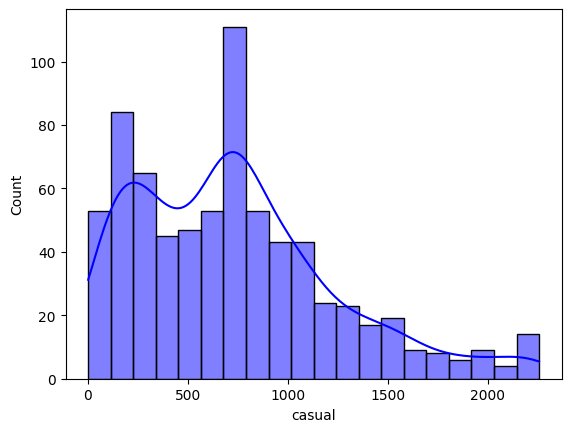

In [22]:
sns.histplot(df["casual"], kde=True, bins=20, color='blue');

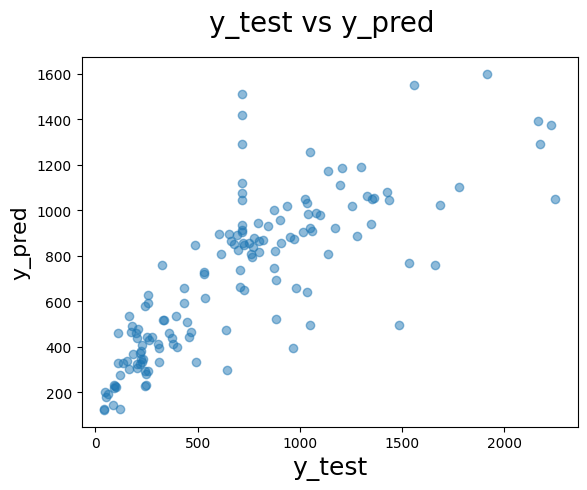

In [23]:
fig = plt.figure()
plt.scatter(y_test, y_pred_test_rf , alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

<AxesSubplot:xlabel='casual', ylabel='Count'>

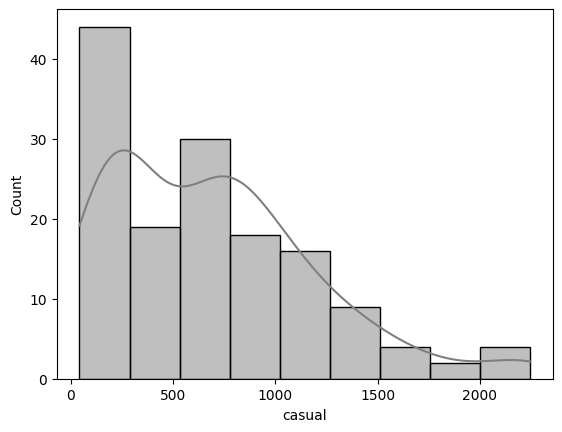

In [24]:
# ploteamos los residuos
sns.histplot(x= y_test,
             color ="grey",
             kde=True)

<AxesSubplot:ylabel='Count'>

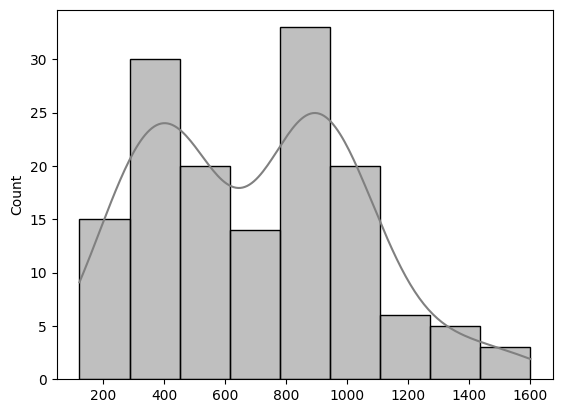

In [25]:
sns.histplot(x= y_pred_test_rf,
             color ="grey",
             kde=True)

In [26]:
param2 = {"max_depth": [6,8,10], # teniendo en cuenta que teníamos overfitting tendremos que reducir la profundidad del modelo, la nuestra anterior era de 17. Bajaremos mucho este valor ya que teníamos un overfitting muy claro
        "max_features": [3,4,5,6],# Ponemos como límite el 4 ya que es el resultado de la raiz cuadrada. 
        # estos dos hiperparámetros son más difíciles de definir, pero usualmente se suelen elegir los siguientes valores
        "min_samples_split": [5, 10, 15,20],
        "min_samples_leaf": [5,10, 15, 20]} 